In [8]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost
import matplotlib.pyplot as plt

In [9]:
data= pd.read_csv('traffic volume.csv')

In [10]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,No,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,No,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,No,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,No,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,No,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [11]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         48204 non-null  object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [13]:
data.isnull().sum()

,0
holiday,0
temp,53
rain,2
snow,12
weather,49
date,0
Time,0
traffic_volume,0


In [14]:
data['temp'].fillna(data['temp'].mean(), inplace=True)
data['rain'].fillna(data['rain'].mean(), inplace=True)
data['snow'].fillna(data['snow'].mean(), inplace=True)

/tmp/ipython-input-14-4238678335.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['temp'].fillna(data['temp'].mean(), inplace=True)
/tmp/ipython-input-14-4238678335.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [15]:
from collections import Counter
print(Counter(data['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [16]:
data['weather'].fillna('Clouds',inplace=True)

/tmp/ipython-input-16-1731991201.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['weather'].fillna('Clouds',inplace=True)


In [17]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['weather', 'holiday']
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [18]:
data

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,7,288.28,0.0,0.0,1,02-10-2012,09:00:00,5545
1,7,289.36,0.0,0.0,1,02-10-2012,10:00:00,4516
2,7,289.58,0.0,0.0,1,02-10-2012,11:00:00,4767
3,7,290.13,0.0,0.0,1,02-10-2012,12:00:00,5026
4,7,291.14,0.0,0.0,1,02-10-2012,13:00:00,4918
...,...,...,...,...,...,...,...,...
48199,7,283.45,0.0,0.0,1,30-09-2018,19:00:00,3543
48200,7,282.76,0.0,0.0,1,30-09-2018,20:00:00,2781
48201,7,282.73,0.0,0.0,10,30-09-2018,21:00:00,2159
48202,7,282.09,0.0,0.0,1,30-09-2018,22:00:00,1450


In [19]:
selected_columns = ['holiday', 'temp', 'rain', 'snow', 'weather', 'traffic_volume']
cor = data[selected_columns].corr()
print(cor)

                 holiday      temp      rain      snow   weather  \
holiday         1.000000 -0.000472  0.000066  0.000432 -0.004328   
temp           -0.000472  1.000000  0.009070 -0.019758 -0.033559   
rain            0.000066  0.009070  1.000000 -0.000090  0.009542   
snow            0.000432 -0.019758 -0.000090  1.000000  0.036662   
weather        -0.004328 -0.033559  0.009542  0.036662  1.000000   
traffic_volume  0.018676  0.130034  0.004714  0.000735 -0.040035   

                traffic_volume  
holiday               0.018676  
temp                  0.130034  
rain                  0.004714  
snow                  0.000735  
weather              -0.040035  
traffic_volume        1.000000  


<Axes: >

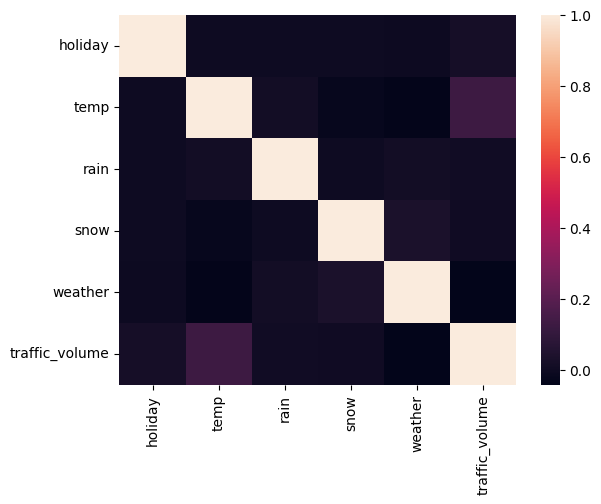

In [20]:
sns.heatmap(cor)

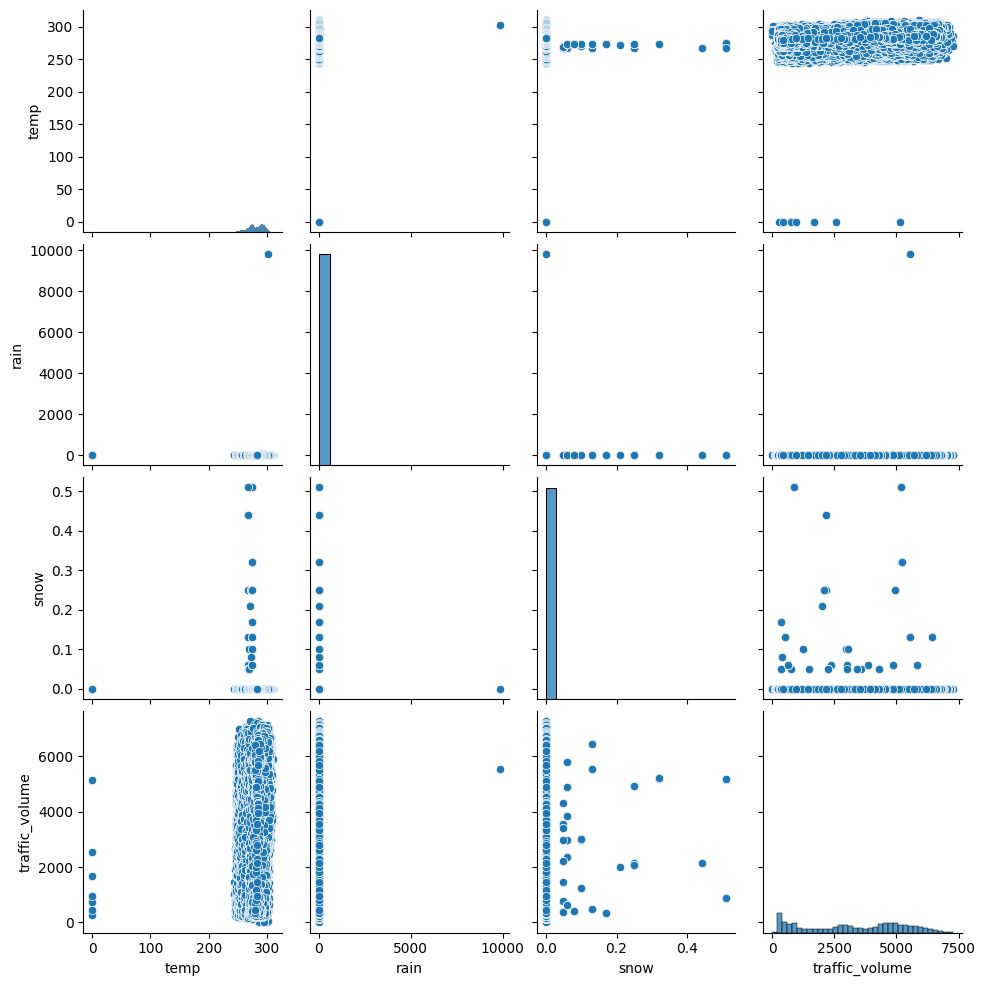

In [21]:
# selected_columns = ['temp', 'rain', 'snow', 'traffic_volume']
# sns.pairplot(data[selected_columns])
# plt.show()
sns.pairplot(data[['temp', 'rain', 'snow', 'traffic_volume']])
plt.show()

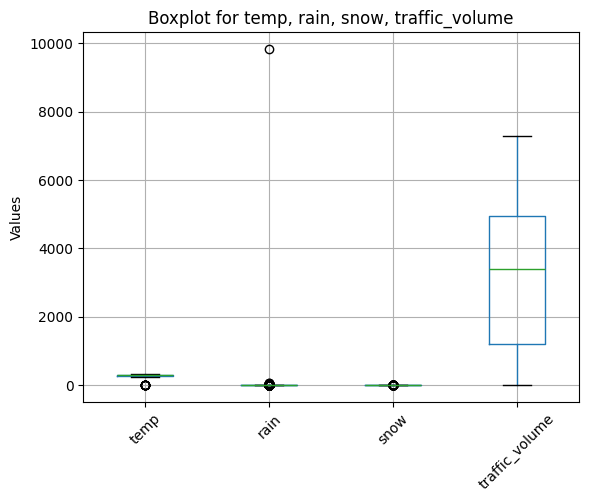

In [22]:
selected_cols = ['temp', 'rain', 'snow', 'traffic_volume']

# Plot boxplot for these columns
data[selected_cols].boxplot()

plt.title("Boxplot for temp, rain, snow, traffic_volume")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [23]:
data[["day", "month", "year"]] = data["date"].str.split("-", expand=True)
data[["hours", "minutes", "seconds"]] = data["Time"].str.split(":", expand=True)


In [24]:
data.drop(columns=['date', 'Time'], axis=1, inplace=True)
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,7,288.28,0.0,0.0,1,5545,02,10,2012,09,00,00
1,7,289.36,0.0,0.0,1,4516,02,10,2012,10,00,00
2,7,289.58,0.0,0.0,1,4767,02,10,2012,11,00,00
3,7,290.13,0.0,0.0,1,5026,02,10,2012,12,00,00
4,7,291.14,0.0,0.0,1,4918,02,10,2012,13,00,00


In [25]:
y = data['traffic_volume']
x = data.drop(columns=['traffic_volume'], axis=1)

In [26]:
names = x.columns
names

Index(['holiday', 'temp', 'rain', 'snow', 'weather', 'day', 'month', 'year',
       'hours', 'minutes', 'seconds'],
      dtype='object')

In [27]:
from sklearn.preprocessing import scale

x = scale(x)

x = pd.DataFrame(x, columns=names)

x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.015856,0.530485,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.015856,0.611467,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.015856,0.627964,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.015856,0.669205,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.015856,0.744939,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [29]:
lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr = svm.SVR()
XGB = xgboost.XGBRegressor()

In [30]:
lin_reg.fit(x_train, y_train)
Dtree.fit(x_train, y_train)
Rand.fit(x_train, y_train)
svr.fit(x_train, y_train)
XGB.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [63]:
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)

In [32]:
from sklearn.metrics import r2_score
print(r2_score(p1,y_train))
print(r2_score(p2,y_train))
print(r2_score(p3,y_train))
print(r2_score(p4,y_train))
print(r2_score(p5,y_train))

-5.517285423636865
1.0
0.9748309577652087
-12.188104231382276
0.8472604751586914


In [64]:
p1= lin_reg.predict(x_test)
p2= Dtree.predict(x_test)
p3= Rand.predict(x_test)
p4= svr.predict(x_test)
p5= XGB.predict(x_test)

In [65]:
from sklearn.metrics import mean_squared_error

In [66]:
MSE = mean_squared_error( p3, y_test)
np.sqrt(MSE)

np.float64(800.3995878230863)

In [73]:
import pickle
pickle.dump(Rand, open("model.pkl", 'wb'))


In [75]:
pickle.dump(le, open("encoder.pkl", 'wb'))